In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.head(5))
print(test.head(5))
print(train.info())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [3]:
train.shape, test.shape

((614, 13), (367, 12))

In [4]:
null_train = train.columns[train.isnull().any()]
train[null_train].isnull().sum()

Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

In [5]:
null_test = test.columns[test.isnull().any()]
test[null_test].isnull().sum()

Gender              11
Dependents          10
Self_Employed       23
LoanAmount           5
Loan_Amount_Term     6
Credit_History      29
dtype: int64

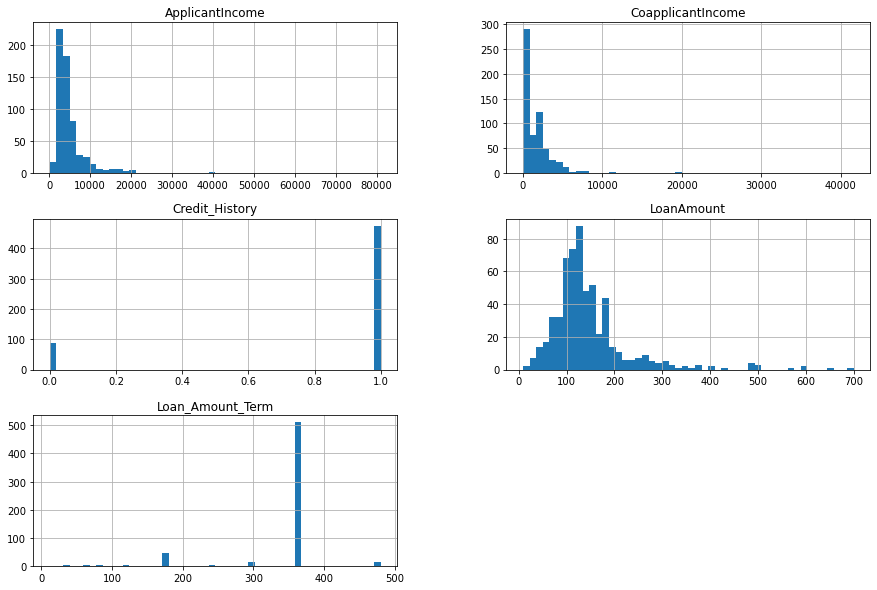

In [6]:
train.hist(bins=50, figsize=(15,10))
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


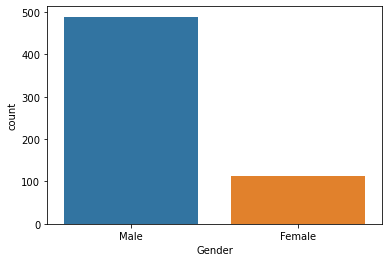

AxesSubplot(0.125,0.125;0.775x0.755)


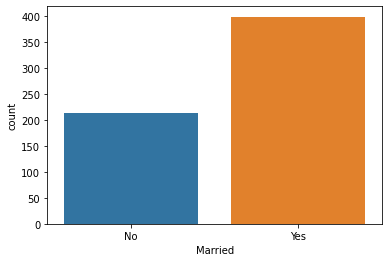

AxesSubplot(0.125,0.125;0.775x0.755)


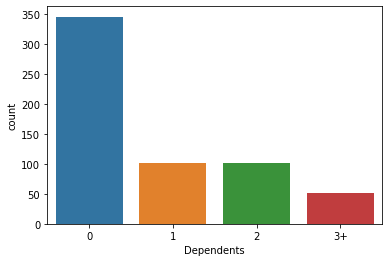

AxesSubplot(0.125,0.125;0.775x0.755)


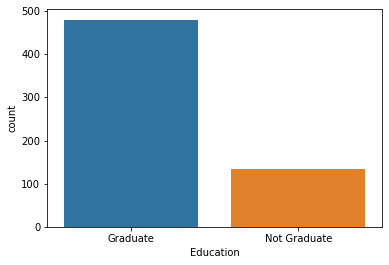

AxesSubplot(0.125,0.125;0.775x0.755)


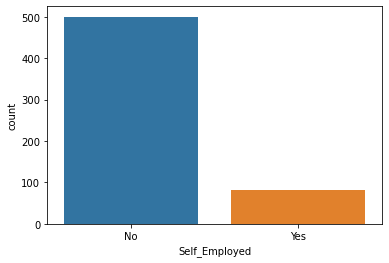

AxesSubplot(0.125,0.125;0.775x0.755)


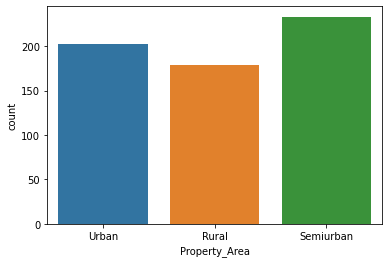

AxesSubplot(0.125,0.125;0.775x0.755)


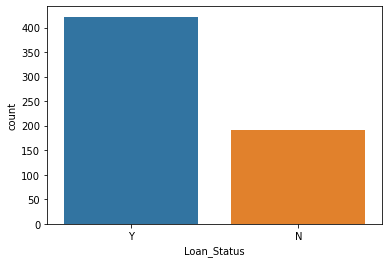

In [7]:
train_obj = train.select_dtypes(include='object')

for col in train_obj.iloc[:, 1:].columns:
    print(sns.countplot(x=col, data=train_obj))
    plt.show()

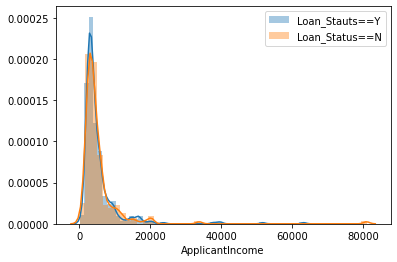

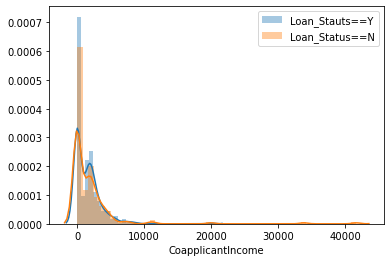

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


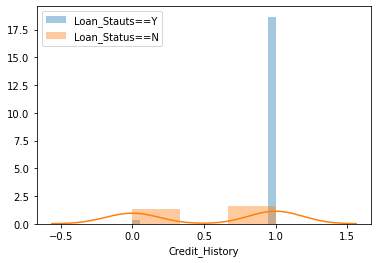

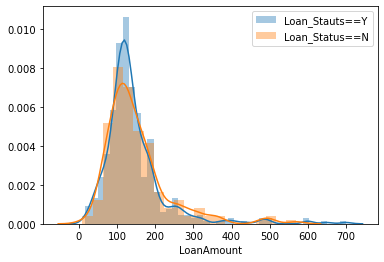

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


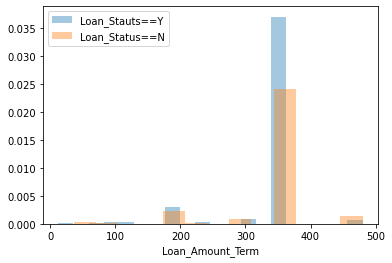

In [8]:
df_approved = train[train['Loan_Status']=='Y']
df_rejected = train[train['Loan_Status']=='N']

non_object_var = ['ApplicantIncome', 'CoapplicantIncome',
                 'Credit_History', 'LoanAmount', 'Loan_Amount_Term']

for obj in non_object_var:
    sns.distplot(df_approved[obj][df_approved[obj].isnull()==False], label='Loan_Stauts==Y')
    sns.distplot(df_rejected[obj][df_rejected[obj].isnull()==False], label='Loan_Status==N')
    plt.legend()
    plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


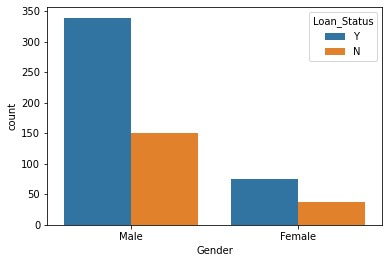

AxesSubplot(0.125,0.125;0.775x0.755)


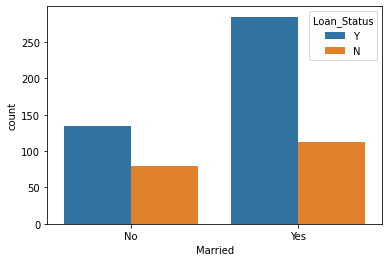

AxesSubplot(0.125,0.125;0.775x0.755)


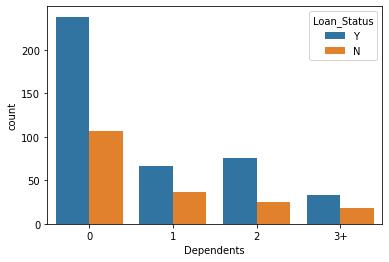

AxesSubplot(0.125,0.125;0.775x0.755)


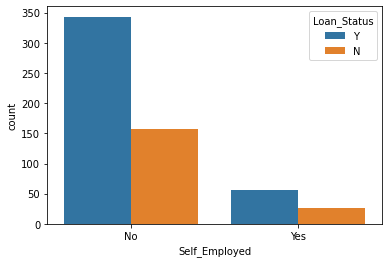

AxesSubplot(0.125,0.125;0.775x0.755)


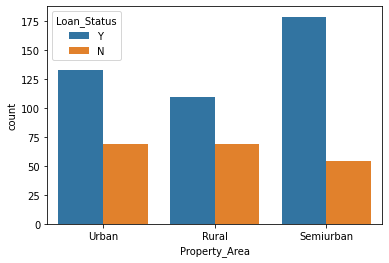

In [9]:
object_var = ['Gender', 'Married', 'Dependents',
             'Self_Employed', 'Property_Area']

for obj in object_var:
    print(sns.countplot(x=obj, data=train_obj, hue='Loan_Status'))
    plt.show()

In [10]:
def fill_with_mode(df, x):
    df[x].fillna(df[x].mode()[0], inplace=True)

has_null_obj = ['Gender', 'Married', 'Dependents',
               'Self_Employed', 'LoanAmount', 'Loan_Amount_Term',
               'Credit_History']

for obj in has_null_obj:
    fill_with_mode(train, obj)
    
for col in train.columns:
    print('Variable', col, 'has missing entry:', sum(train[col].isnull()))

Variable Loan_ID has missing entry: 0
Variable Gender has missing entry: 0
Variable Married has missing entry: 0
Variable Dependents has missing entry: 0
Variable Education has missing entry: 0
Variable Self_Employed has missing entry: 0
Variable ApplicantIncome has missing entry: 0
Variable CoapplicantIncome has missing entry: 0
Variable LoanAmount has missing entry: 0
Variable Loan_Amount_Term has missing entry: 0
Variable Credit_History has missing entry: 0
Variable Property_Area has missing entry: 0
Variable Loan_Status has missing entry: 0


In [11]:
X = train.iloc[:, 1:-1]
y = train.iloc[:, -1]
print(X.shape)
print(y.shape)

(614, 11)
(614,)


In [12]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [13]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [14]:
onehot_targets = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
                  'Property_Area']

In [15]:
for target in onehot_targets:
    onehot_temp = pd.get_dummies(X[target])
    X = X.drop(target, axis=1)
    X = pd.concat([onehot_temp, X], axis=1)

In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)

LabelEncoder()

In [17]:
y = le.transform(y)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
mdl = LogisticRegression()
mdl.fit(X_train, y_train)

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
pred_cv = mdl.predict(X_val)

In [21]:
mse = np.mean((pred_cv - y_val)**2)
mse

0.21138211382113822

In [22]:
accuracy_score(y_val, pred_cv)

0.7886178861788617

In [23]:
y_pred = mdl.predict(X_val)
print('Accuracy on test set: {}'.format(mdl.score(X_val, y_val)))

Accuracy on test set: 0.7886178861788617


In [24]:
# from pandas import Series, DataFrame
# coeff = DataFrame(X_train.columns)
# coeff['Coefficient Estimate'] = Series(mdl.coef_)
# print(coeff)

In [25]:
# predictors = X_train.columns
# coef = Series(mdl.coef_, predictors).sort_values().plot(kind='bar', title='Model Coefficients')
# print(predictors)

In [26]:
X_test = test.iloc[:, 1:]
    
for feature in has_null_obj:
    fill_with_mode(X_test, feature)
    
# make sure all null value has bee filled
for col in X_test.columns:
    print('Variable', col, 'has missing entry:', sum(X_test[col].isnull()))

Variable Gender has missing entry: 0
Variable Married has missing entry: 0
Variable Dependents has missing entry: 0
Variable Education has missing entry: 0
Variable Self_Employed has missing entry: 0
Variable ApplicantIncome has missing entry: 0
Variable CoapplicantIncome has missing entry: 0
Variable LoanAmount has missing entry: 0
Variable Loan_Amount_Term has missing entry: 0
Variable Credit_History has missing entry: 0
Variable Property_Area has missing entry: 0


In [27]:
for target in onehot_targets:
    onehot_temp = pd.get_dummies(X_test[target])
    X_test = X_test.drop(target, axis=1)
    X_test = pd.concat([onehot_temp, X_test], axis=1)

In [28]:
print(X.shape)
print(X_test.shape)

(614, 20)
(367, 20)


In [29]:
X.head()

,Rural,Semiurban,Urban,No,Yes,Graduate,Not Graduate,0,1,2,3+,No,Yes,Female,Male,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,1,5849,0.0,120.0,360.0,1.0
1,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,4583,1508.0,128.0,360.0,1.0
2,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,3000,0.0,66.0,360.0,1.0
3,0,0,1,1,0,0,1,1,0,0,0,0,1,0,1,2583,2358.0,120.0,360.0,1.0
4,0,0,1,1,0,1,0,1,0,0,0,1,0,0,1,6000,0.0,141.0,360.0,1.0


In [30]:
X_test.head()

,Rural,Semiurban,Urban,No,Yes,Graduate,Not Graduate,0,1,2,3+,No,Yes,Female,Male,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,1,5720,0,110.0,360.0,1.0
1,0,0,1,1,0,1,0,0,1,0,0,0,1,0,1,3076,1500,126.0,360.0,1.0
2,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,5000,1800,208.0,360.0,1.0
3,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,2340,2546,100.0,360.0,1.0
4,0,0,1,1,0,0,1,1,0,0,0,1,0,0,1,3276,0,78.0,360.0,1.0


In [34]:
mdl.fit(X_train,y_train)
results = mdl.predict(X_test)
submit = pd.DataFrame({'Loan_ID': test['Loan_ID'], 'Loan_Status': results})
print(submit.head())

    Loan_ID  Loan_Status
0  LP001015            1
1  LP001022            1
2  LP001031            1
3  LP001035            1
4  LP001051            1


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
pd.DataFrame(submit).to_csv('submit.csv', index=False)

In [37]:
submission = pd.read_csv('submit.csv')
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [38]:
submission.to_csv('submit.csv', index=False)